In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [8]:
# TODO: code and runtime results
#from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
df_train_indentity=pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
df_test=pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
df_test_indentity=pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

In [3]:
df_train_P1=df_train[['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card4',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',]]


df_train_indentity_P1=df_train_indentity[['TransactionID','DeviceType','DeviceInfo']]
df_complete_train_P1 = pd.merge(df_train_P1, df_train_indentity_P1, on='TransactionID', how='outer')


del [[df_train_indentity_P1,df_train_P1]]

In [4]:
df_train_NotFraud=df_complete_train_P1.loc[df_complete_train_P1['isFraud'] == 0]
df_train_Fraud=df_complete_train_P1.loc[df_complete_train_P1['isFraud'] == 1]

In [5]:
print(df_train_Fraud.shape)
print(df_train_NotFraud.shape)

(20663, 15)
(569877, 15)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd

Text(0.5, 1.0, 'Fraudulent')

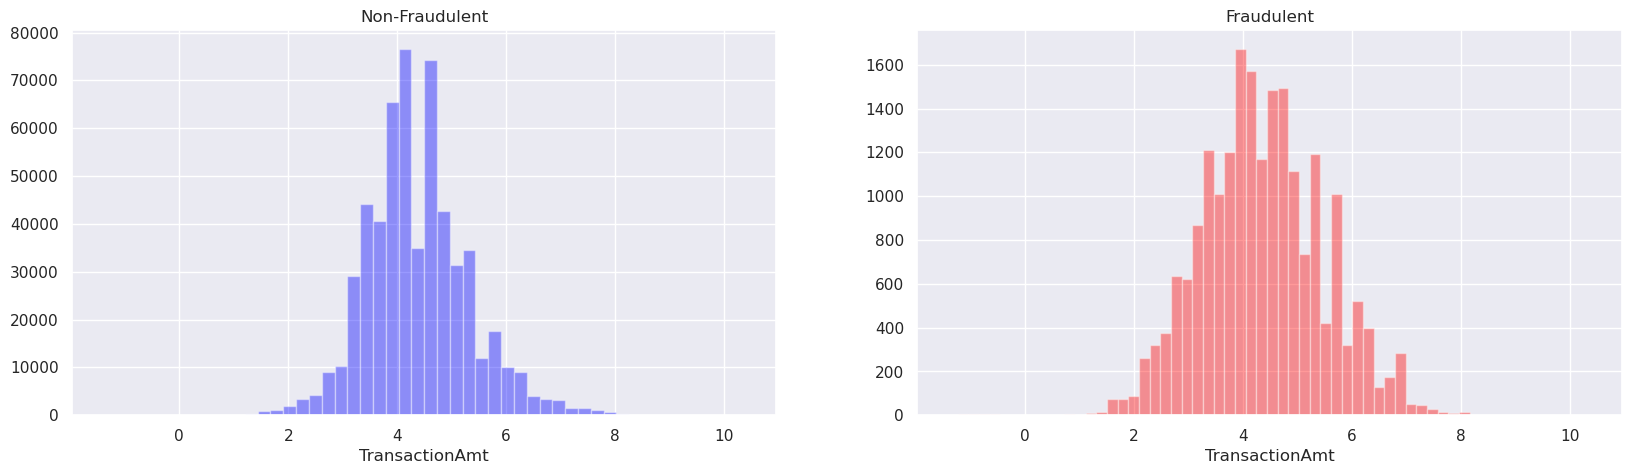

In [9]:
sns.set()
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.distplot(np.log(df_train_NotFraud['TransactionAmt']), color='blue',kde=False, ax=ax[0]).set_title('Non-Fraudulent')
sns.distplot(np.log(df_train_Fraud['TransactionAmt']), color='red',kde=False, ax=ax[1]).set_title('Fraudulent')

Text(0.5, 1.0, 'Fraudulent')

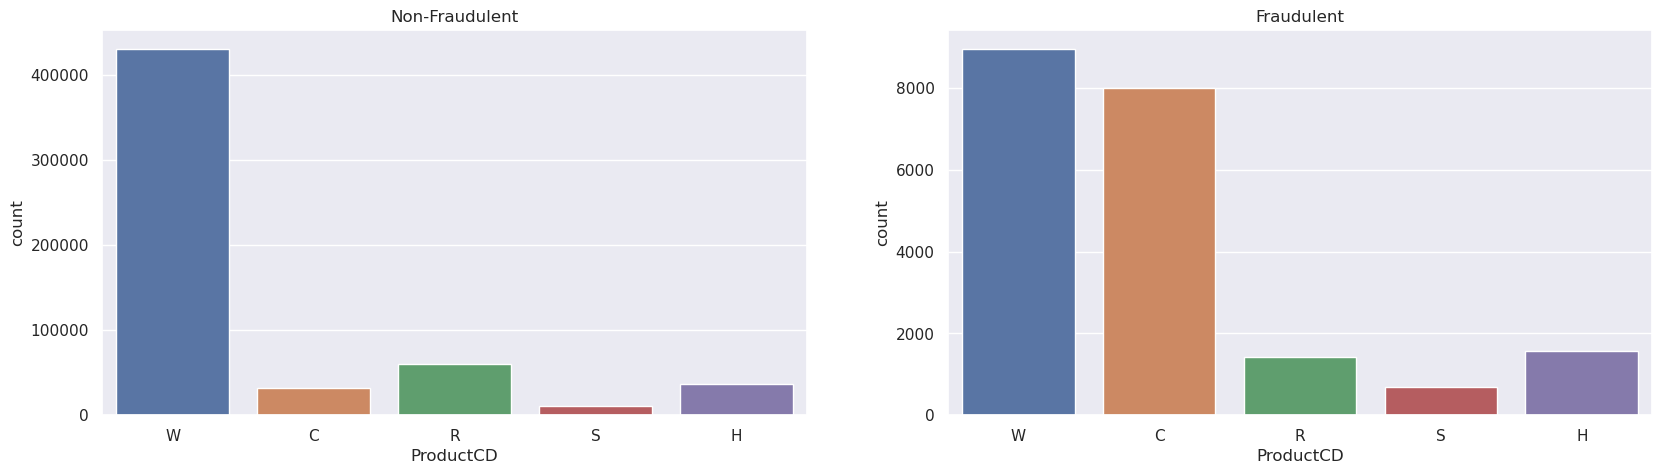

In [10]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.countplot(data=df_train_NotFraud,x='ProductCD',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='ProductCD',ax=ax[1]).set_title('Fraudulent')

Text(0.5, 1.0, 'Fraudulent')

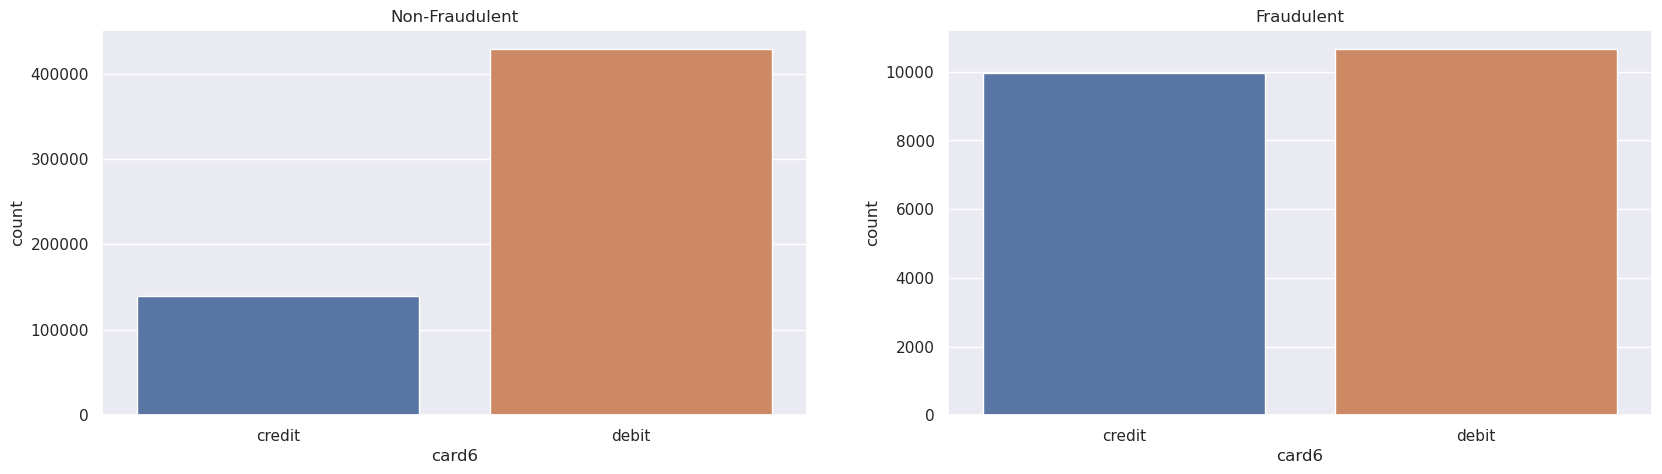

In [11]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.countplot(data=df_train_NotFraud,x='card6',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='card6',ax=ax[1]).set_title('Fraudulent')

Text(0.5, 1.0, 'Fraudulent')

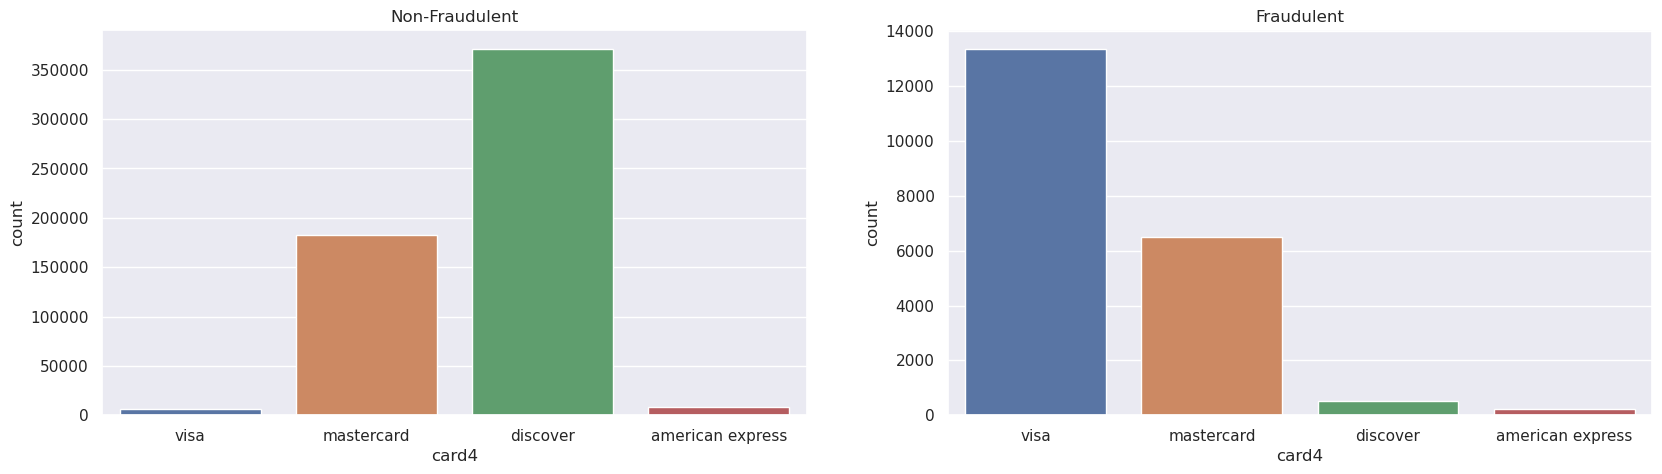

In [12]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.countplot(data=df_train_NotFraud,x='card4',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='card4',ax=ax[1]).set_title('Fraudulent')

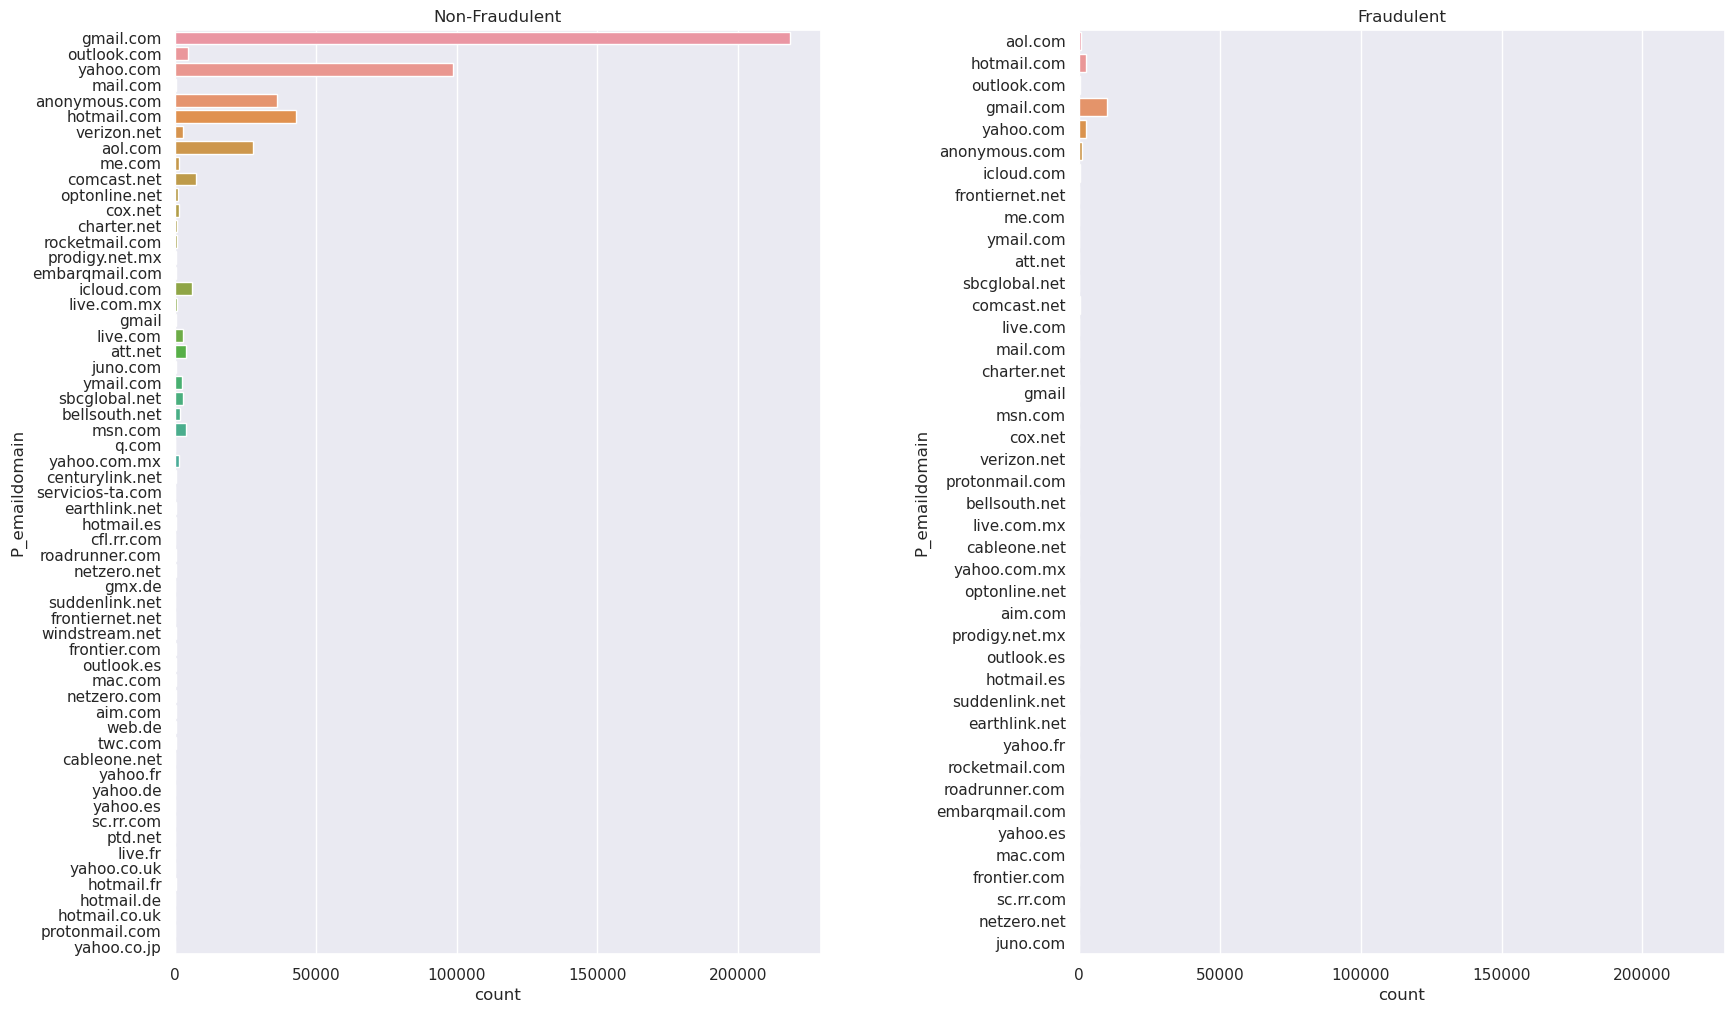

In [13]:
fig, ax =plt.subplots(1,2,figsize=(20,12),sharex=True)
sns.countplot(data=df_train_NotFraud,y='P_emaildomain',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,y='P_emaildomain',ax=ax[1]).set_title('Fraudulent')
plt.subplots_adjust(hspace=0.4, wspace=0.4)

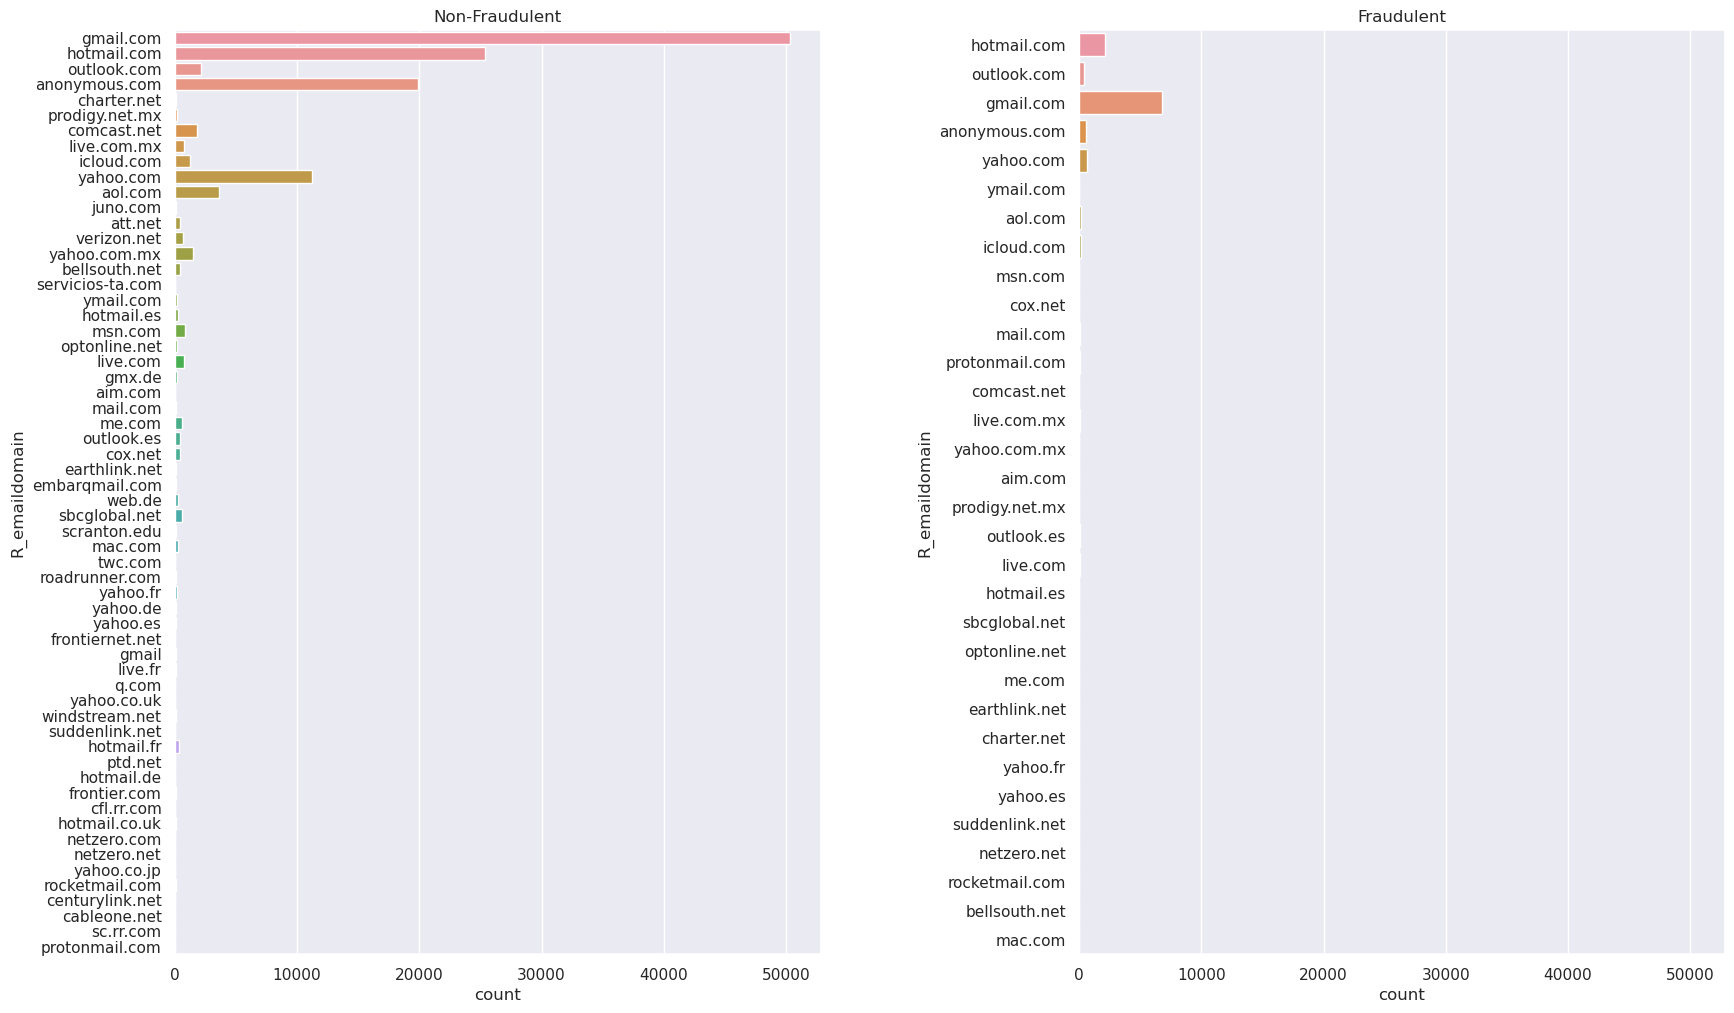

In [14]:
fig, ax =plt.subplots(1,2,figsize=(20,12),sharex=True)
sns.countplot(data=df_train_NotFraud,y='R_emaildomain',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,y='R_emaildomain',ax=ax[1]).set_title('Fraudulent')
plt.subplots_adjust(hspace=0.4, wspace=0.4)

Text(0.5, 1.0, 'Fraudulent')

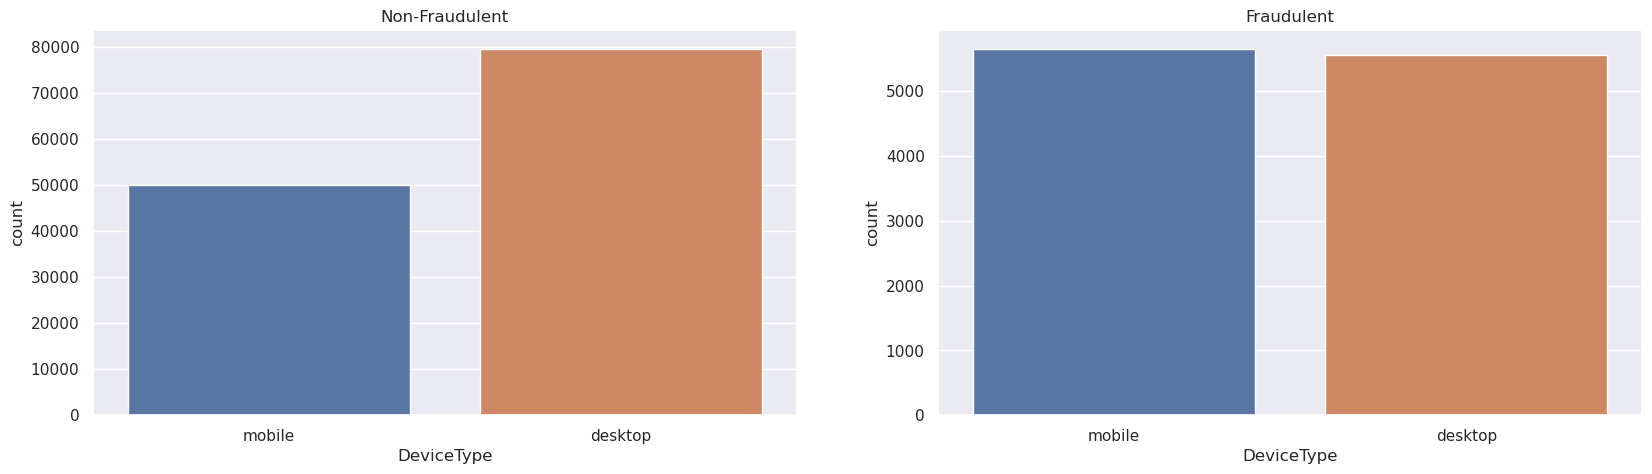

In [15]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.countplot(data=df_train_NotFraud,x='DeviceType',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='DeviceType',ax=ax[1]).set_title('Fraudulent')

Text(0.5, 1.0, 'Fraudulent')

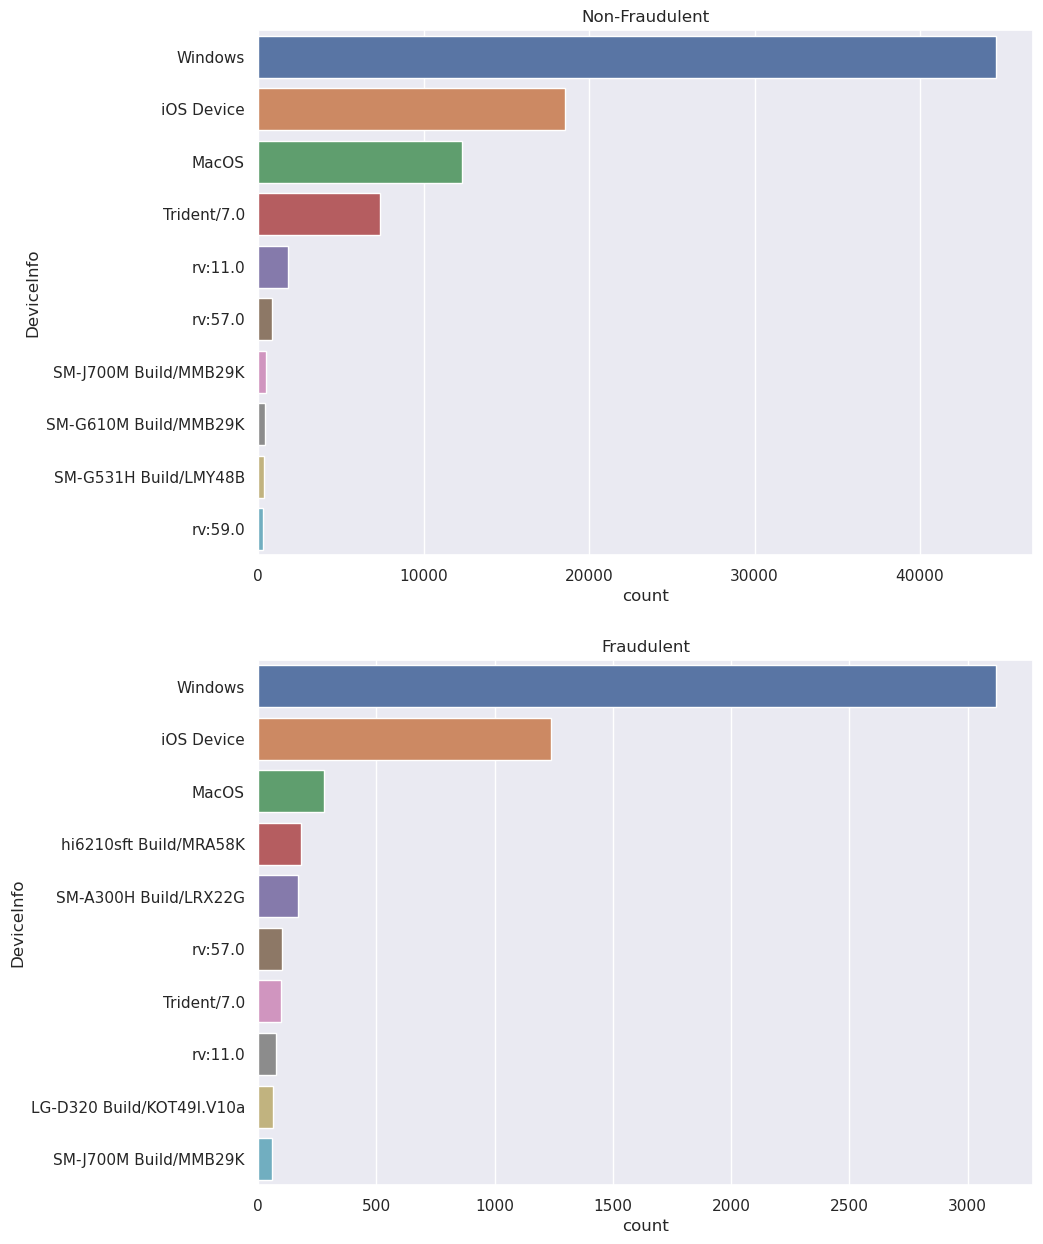

In [16]:
fig, ax =plt.subplots(2,1,figsize=(10,15),sharex=False)
sns.countplot(data=df_train_NotFraud,y='DeviceInfo',
              order=df_train_NotFraud.DeviceInfo.value_counts().iloc[:10].index,ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,y='DeviceInfo',
              order=df_train_Fraud.DeviceInfo.value_counts().iloc[:10].index,ax=ax[1]).set_title('Fraudulent')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Fraudulent')

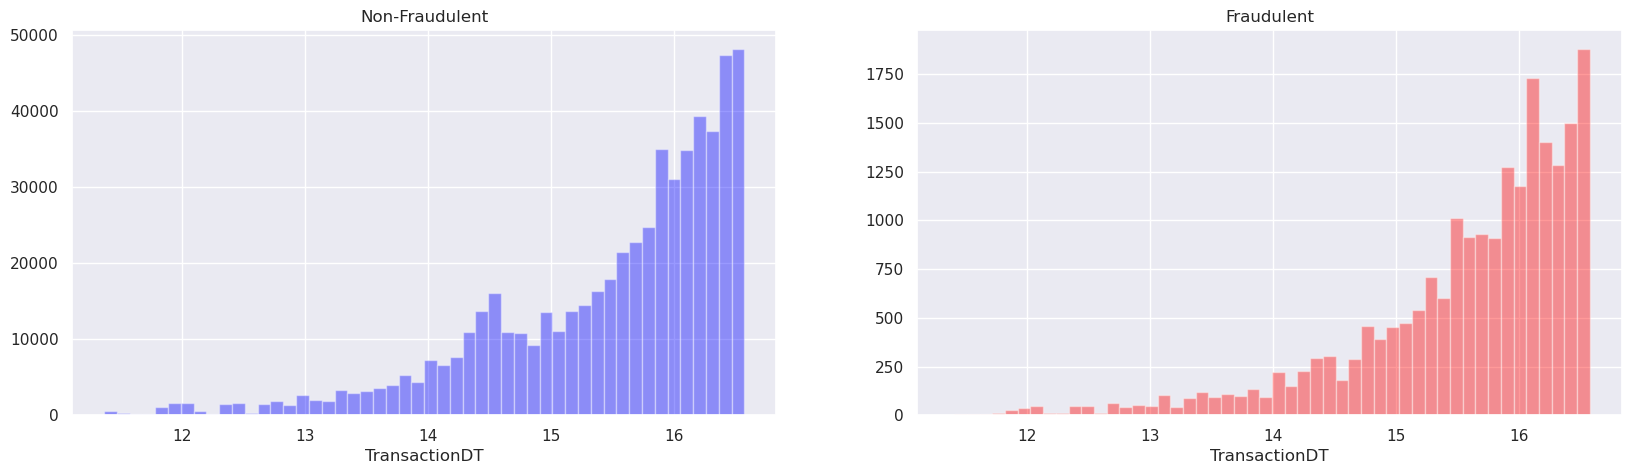

In [17]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.distplot(np.log(df_train_NotFraud['TransactionDT']), color='blue',kde=False, ax=ax[0]).set_title('Non-Fraudulent')
sns.distplot(np.log(df_train_Fraud['TransactionDT']), color='red',kde=False, ax=ax[1]).set_title('Fraudulent')

ValueError: Length of Float64Index vectors must match length of `data` when both are used, but `data` has length 569877 and the vector passed to `x` has length 332.

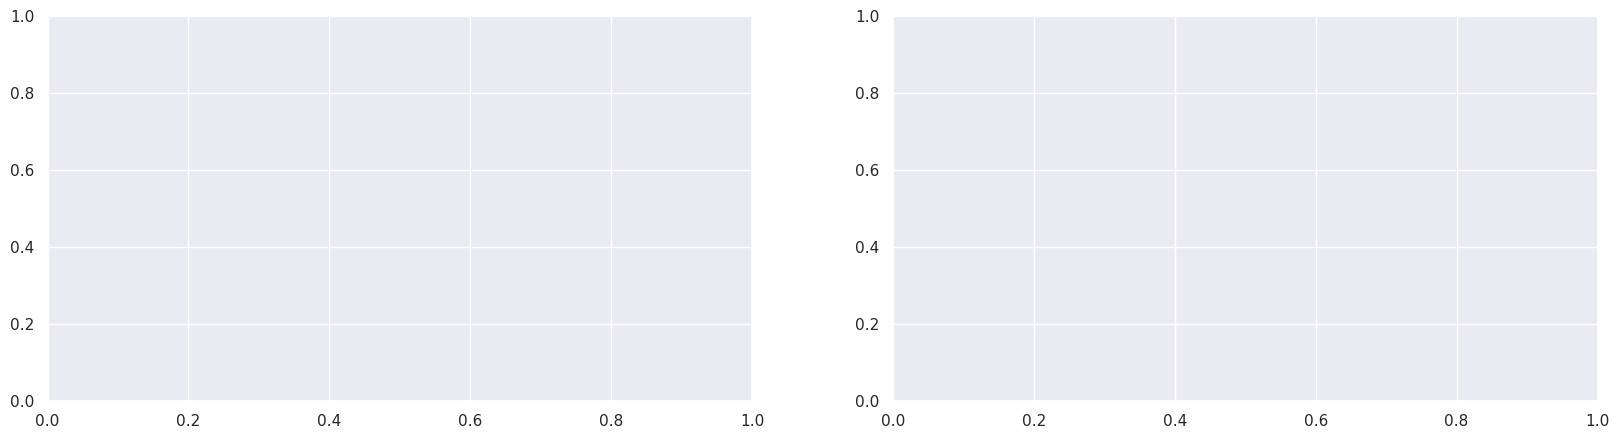

In [18]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.lineplot(x=df_train_NotFraud['addr1'].value_counts().index, y=df_train_NotFraud['addr1'].value_counts(),markers=True, dashes=False,
             data=df_train_NotFraud,color='blue',ax=ax[0]).set_title('Non-Fraudulent')
sns.lineplot(x=df_train_Fraud['addr1'].value_counts().index, y=df_train_Fraud['addr1'].value_counts(),markers=True, dashes=False,
             data=df_train_Fraud,color='red',ax=ax[1]).set_title('Fraudulent')

Text(0.5, 1.0, 'Fraudulent')

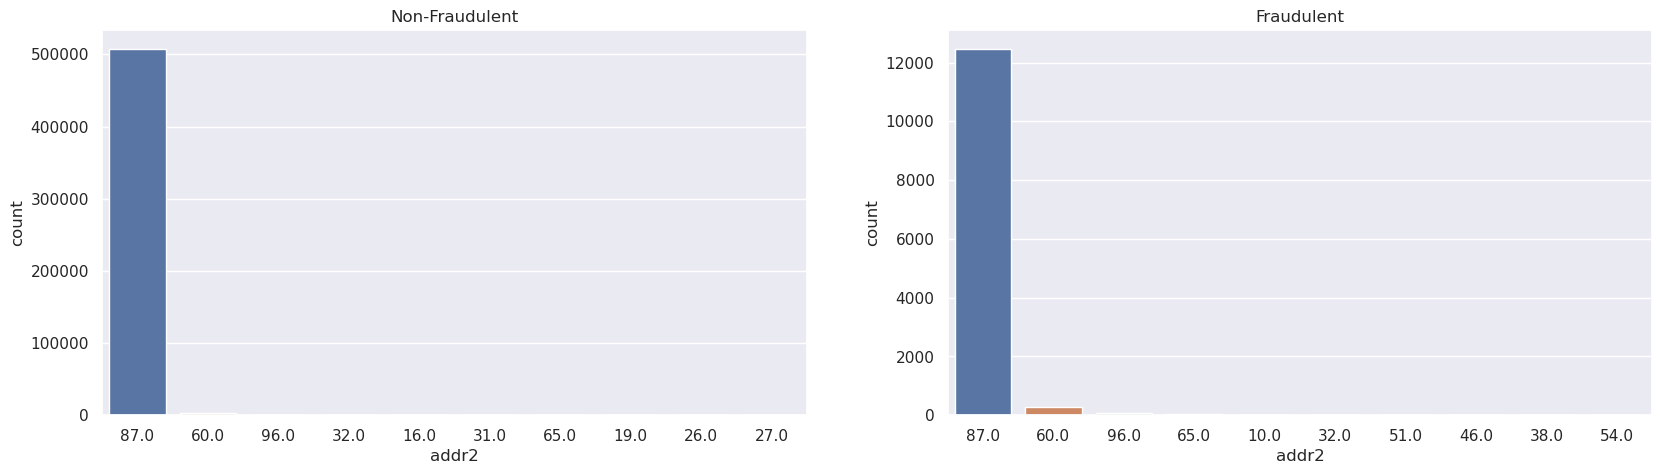

In [19]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)
sns.countplot(data=df_train_NotFraud,x='addr2',
              order=df_train_NotFraud.addr2.value_counts().iloc[:10].index,ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='addr2',
              order=df_train_Fraud.addr2.value_counts().iloc[:10].index,ax=ax[1]).set_title('Fraudulent')

ValueError: Length of Float64Index vectors must match length of `data` when both are used, but `data` has length 569877 and the vector passed to `x` has length 2635.

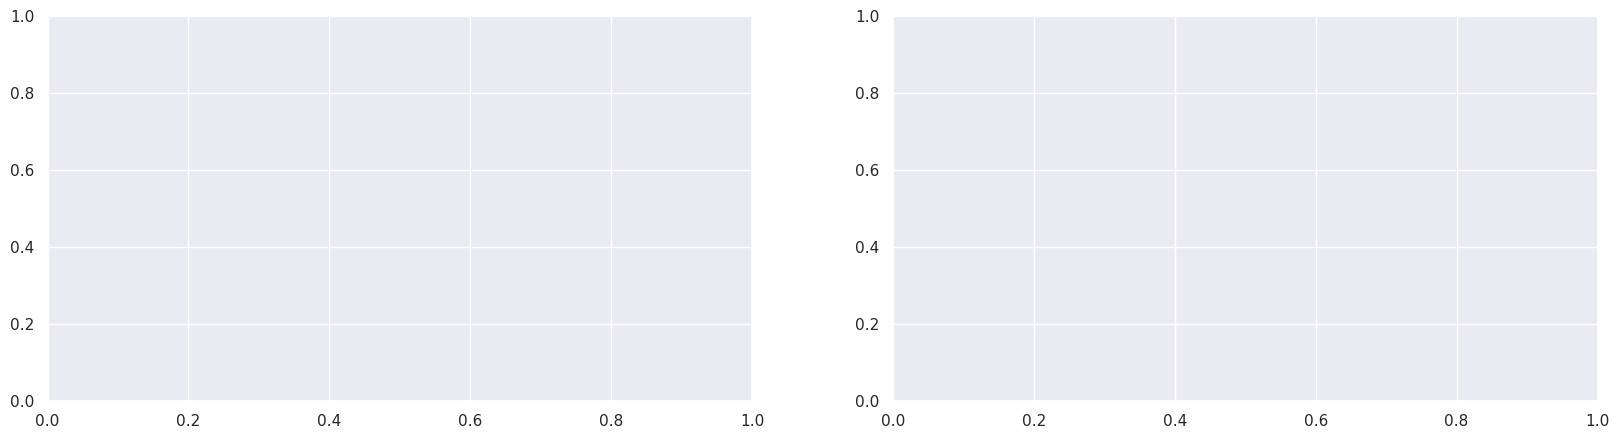

In [20]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)
sns.lineplot(x=df_train_NotFraud['dist1'].value_counts().index, y=df_train_NotFraud['dist1'].value_counts(),markers=True, dashes=False,
             data=df_train_NotFraud,color='blue',ax=ax[0]).set_title('Non-Fraudulent')
sns.lineplot(x=df_train_Fraud['dist1'].value_counts().index, y=df_train_Fraud['dist1'].value_counts(),markers=True, dashes=False,
             data=df_train_Fraud,color='red',ax=ax[1]).set_title('Fraudulent')

ValueError: Length of Float64Index vectors must match length of `data` when both are used, but `data` has length 569877 and the vector passed to `x` has length 1723.

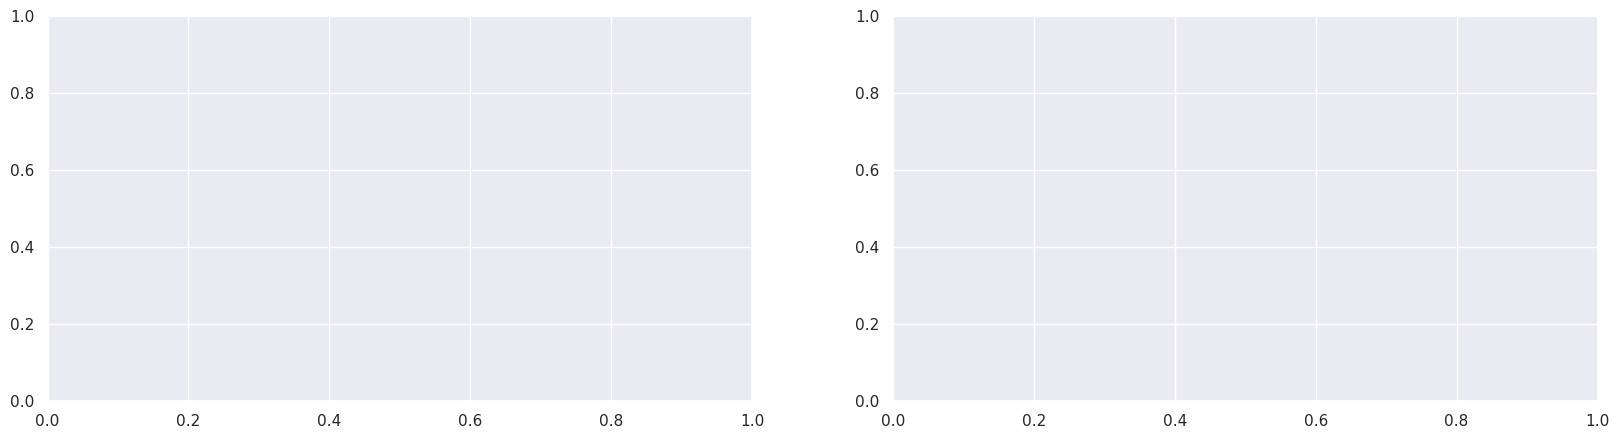

In [21]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)
sns.lineplot(x=df_train_NotFraud['dist2'].value_counts().index, y=df_train_NotFraud['dist2'].value_counts(),markers=True, dashes=False,
             data=df_train_NotFraud,color='blue',ax=ax[0]).set_title('Non-Fraudulent')
sns.lineplot(x=df_train_Fraud['dist2'].value_counts().index, y=df_train_Fraud['dist2'].value_counts(),markers=True, dashes=False,
             data=df_train_Fraud,color='red',ax=ax[1]).set_title('Fraudulent')

In [22]:
del [[df_train_NotFraud,df_train_Fraud,df_complete_train_P1]]

In [23]:
# TODO: code to generate the frequency graph
df_train.groupby('addr2')['TransactionID'].nunique().nlargest(5)

addr2
87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
Name: TransactionID, dtype: int64

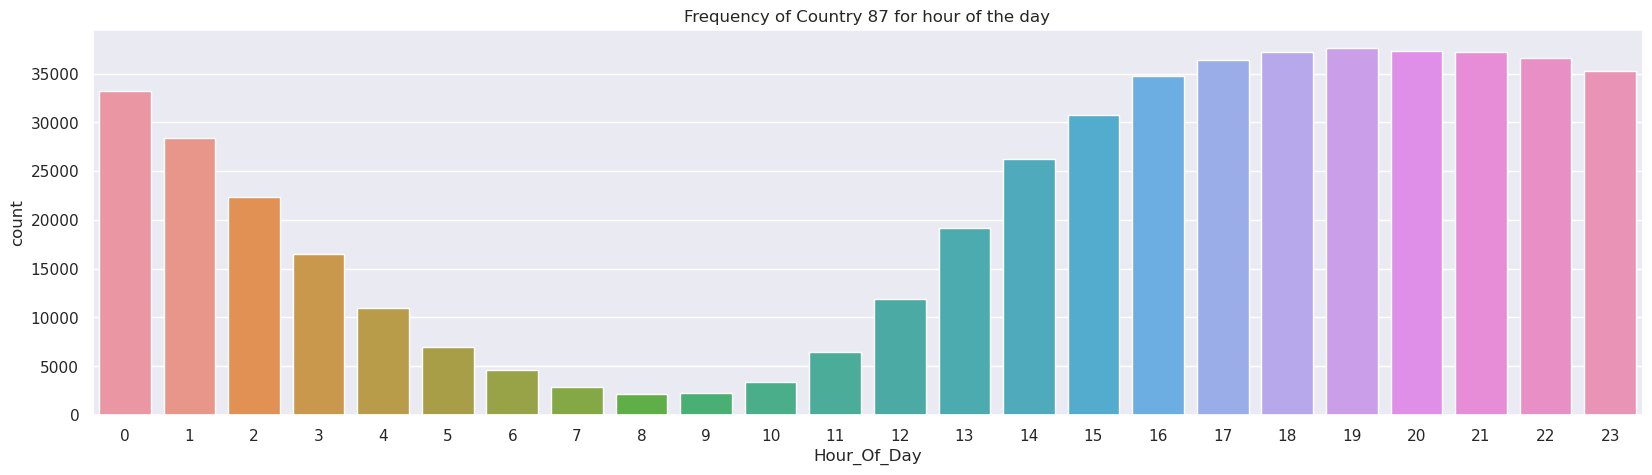

In [24]:
df_train_P2=df_train.copy()
df_train_P2['Hour_Of_Day'] = (df_train_P2['TransactionDT']//(3600))%24
plt.figure(figsize=(20,5))
sns.countplot(data=df_train_P2[df_train_P2.addr2 == 87.0],x='Hour_Of_Day').set_title('Frequency of Country 87 for hour of the day')
del [df_train_P2]

Text(0.5, 1.0, 'Transaction Amount below 500')

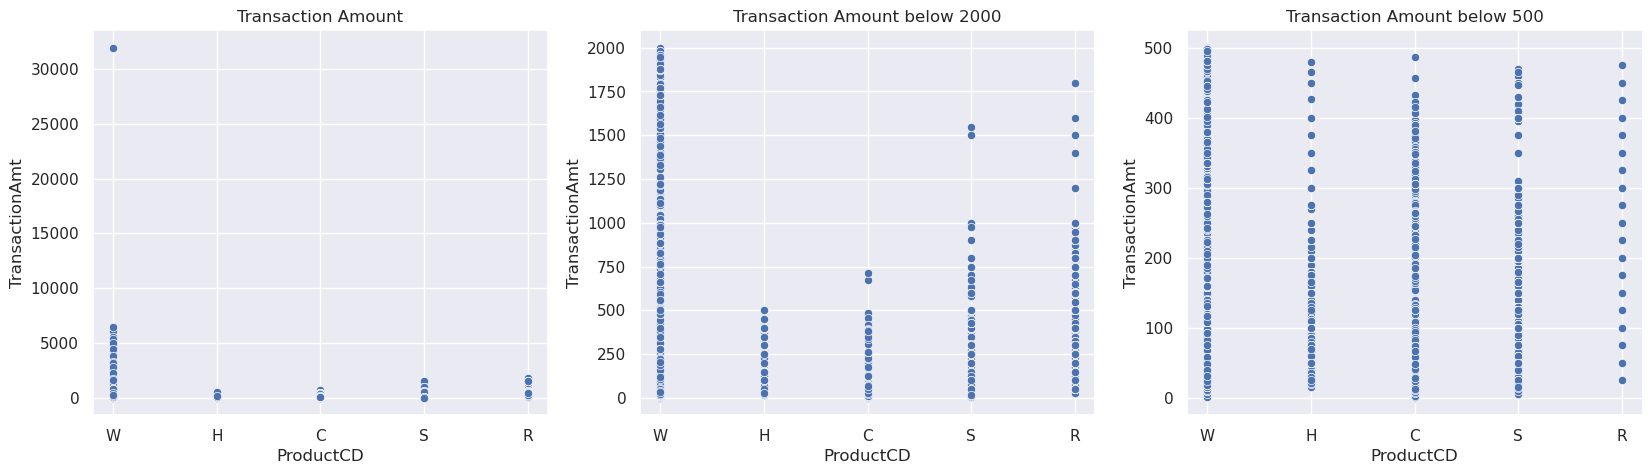

In [25]:
# TODO: code to analyze prices for different product codes
fig, ax =plt.subplots(1,3,figsize=(20,5),sharex=True)
sns.scatterplot(data=df_train,x='ProductCD',y='TransactionAmt',ax=ax[0]).set_title('Transaction Amount')
sns.scatterplot(data=df_train[df_train.TransactionAmt<2000],x='ProductCD',y='TransactionAmt',ax=ax[1]).set_title('Transaction Amount below 2000')
sns.scatterplot(data=df_train[df_train.TransactionAmt<500],x='ProductCD',y='TransactionAmt',ax=ax[2]).set_title('Transaction Amount below 500')

In [26]:
df_train['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [27]:
df_train.groupby('ProductCD', as_index=False)['TransactionAmt'].mean()

,ProductCD,TransactionAmt
0,C,42.872353
1,H,73.170058
2,R,168.306188
3,S,60.269487
4,W,153.158554


Spearman
                TransactionAmt  Hour_Of_Day
TransactionAmt         1.00000      0.03832
Hour_Of_Day            0.03832      1.00000



Pearson
                TransactionAmt  Hour_Of_Day
TransactionAmt        1.000000     0.044532
Hour_Of_Day           0.044532     1.000000


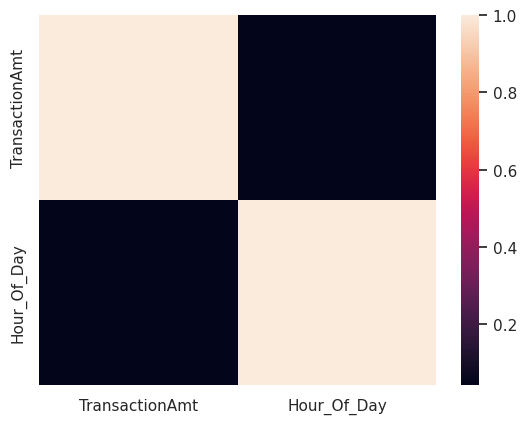

In [28]:
# TODO: code to calculate correlation coefficient
df_train_P4=df_train.copy()
df_train_P4['Hour_Of_Day'] = (df_train_P4['TransactionDT']//(3600))%24
corr_pearson = df_train_P4[['TransactionAmt','Hour_Of_Day']].corr()
corr_spearman = df_train_P4[['TransactionAmt','Hour_Of_Day']].corr(method='spearman')
sns.heatmap(corr_pearson)
print("Spearman")
print(corr_spearman)
print("\n\n\nPearson")
print(corr_pearson)

del [df_train_P4]

In [29]:
# TODO: code to generate the plot here.
df_train_P5=df_train.copy()
df_train_P5=df_train_P5[['TransactionID',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card4',]]
df_train_P5['Hour_Of_Day'] = (df_train_P5['TransactionDT']//(3600))%24

df_train_NotFraud=df_train_P5.loc[df_train['isFraud'] == 0]
df_train_Fraud=df_train_P5.loc[df_train['isFraud'] == 1]

Text(0.5, 1.0, 'Fraudulent')

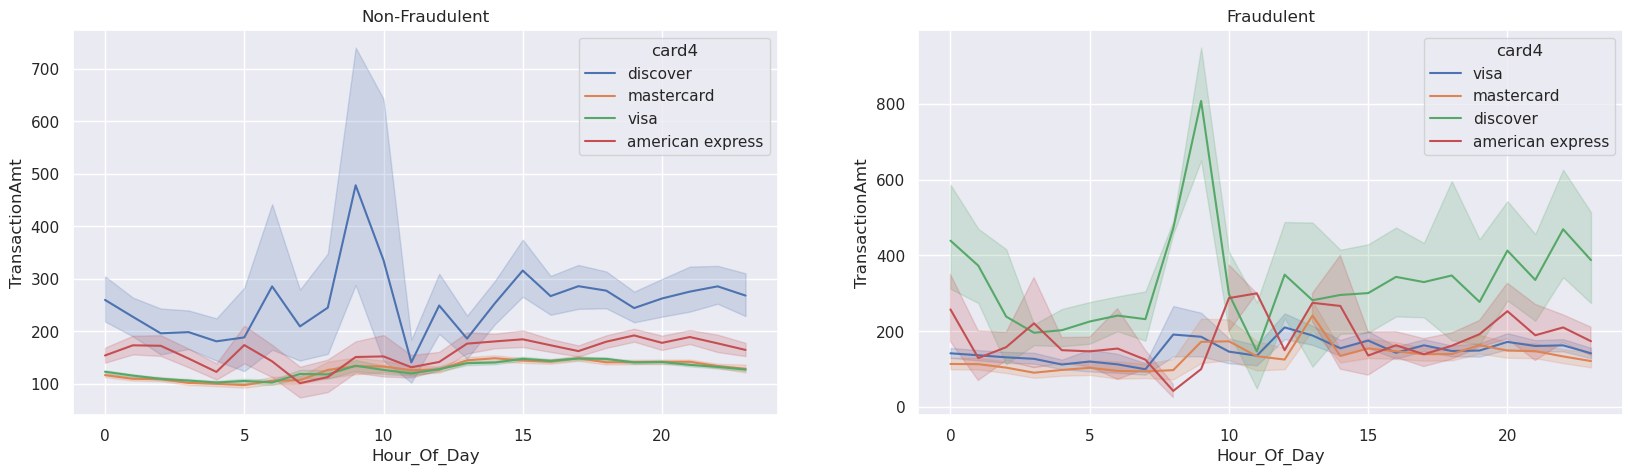

In [30]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)
sns.lineplot(y='TransactionAmt', x='Hour_Of_Day',markers=True, dashes=False,
             data=df_train_NotFraud,hue='card4',ax=ax[0]).set_title('Non-Fraudulent')
sns.lineplot(y='TransactionAmt', x='Hour_Of_Day',markers=True, dashes=False,
             data=df_train_Fraud,hue='card4',ax=ax[1]).set_title('Fraudulent')

In [31]:
del [[df_train_NotFraud,df_train_Fraud,df_train_P5]]

In [32]:
# TODO: code for your final model
df_train_P6=df_train.copy()
df_train_P6['Hour_Of_Day'] = (df_train_P6['TransactionDT']//(3600))%24
df_train_P6=df_train_P6.iloc[: , list(range(0, 155))]
df_complete_train = pd.merge(df_train_P6, df_train_indentity, on='TransactionID', how='outer')

del [df_train_P6]

In [33]:
df_test_P6=df_test.copy()
df_test_P6['Hour_Of_Day'] = (df_test_P6['TransactionDT']//(3600))%24
df_test_P6=df_test_P6.iloc[: , list(range(0, 155))]
df_complete_test = pd.merge(df_test_P6, df_test_indentity, on='TransactionID', how='outer')

del [df_test_P6]

In [34]:
df_complete_train.drop(['TransactionID','TransactionDT','P_emaildomain','R_emaildomain','DeviceInfo'], axis=1, inplace=True)

In [35]:
Test_T_ID=df_test['TransactionID']

df_complete_test.drop(['TransactionID','TransactionDT','P_emaildomain','R_emaildomain','DeviceInfo','V101'], axis=1, inplace=True)

In [36]:
df_complete_train.shape

(590540, 190)

In [37]:
df_complete_test.shape

(506691, 189)

In [38]:
# df_complete_test.columns.symmetric_difference(df_complete_train.columns)

In [39]:
X = df_complete_train[[col for col in df_complete_train.columns if col != 'isFraud']]
Y = df_complete_train['isFraud']

X.fillna(-1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [40]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score

In [41]:
cat_cols = X.dtypes==object
cat_cols = X.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [43]:
df_complete_test.fillna(-1,inplace=True)

cat_cols = df_complete_test.dtypes==object
cat_cols = df_complete_test.columns[cat_cols].tolist()

df_complete_test[cat_cols] = df_complete_test[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [44]:
print(X.shape)
print(df_complete_test.shape)

(590540, 189)
(506691, 189)


In [45]:
ss = preprocessing.StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
df_complete_test=pd.DataFrame(ss.fit_transform(df_complete_test),columns = df_complete_test.columns)

In [46]:
# logreg = LogisticRegression()
# logreg.fit(X, Y)

# print('Accuracy of Logistic regression classifier on training set: {:.2f}'
#      .format(logreg.score(X, Y)))

# Y_pred = logreg.predict_proba(df_complete_test)[:,1]
# logregResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred}
# df_logregResult = pd.DataFrame(logregResult)
# df_logregResult.head()  
# df_logregResult.shape

# df_logregResult.to_csv('submissionLogReg_Final_SS.csv',index=False)

In [47]:
# Y_pred_roc = logreg.predict_proba(X)[:,1]
# print(roc_auc_score(Y,Y_pred_roc))

In [48]:
# df_train_KNN_P6=df_train.copy()
# df_train_KNN_P6['Hour_Of_Day'] = (df_train_KNN_P6['TransactionDT']//(3600))%24
# df_train_KNN_P6=df_train_KNN_P6.iloc[: , list(range(0, 155))]
# df_complete__KNN_train = pd.merge(df_train_KNN_P6, df_train_indentity, on='TransactionID', how='outer')

# del [df_train_KNN_P6]

In [49]:
# X_KNN_NotFraud=df_complete__KNN_train.loc[df_complete__KNN_train['isFraud'] == 0]
# X_KNN_Fraud=df_complete__KNN_train.loc[df_complete__KNN_train['isFraud'] == 1]
# X_KNN_NotFraud=X_KNN_NotFraud.sample(n = 15000)
# KNN_merge=pd.concat([X_KNN_Fraud,X_KNN_NotFraud])

In [50]:
# X_KNN = KNN_merge[[col for col in KNN_merge.columns if col != 'isFraud']]
# Y_KNN = KNN_merge['isFraud']

# X_KNN.fillna(-1,inplace=True)

In [51]:
# X_KNN.drop(['TransactionID','TransactionDT','P_emaildomain','R_emaildomain','DeviceInfo'], axis=1, inplace=True)

In [52]:
# cat_cols = X_KNN.dtypes==object
# cat_cols = X_KNN.columns[cat_cols].tolist()

# X_KNN[cat_cols] = X_KNN[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [53]:
# X_KNN = pd.DataFrame(ss.fit_transform(X_KNN),columns = X_KNN.columns)

In [54]:
# knn = KNeighborsClassifier(n_jobs=-1)
# knn.fit(X_KNN, Y_KNN)
# print('Accuracy of K-NN classifier on training set: {:.2f}'
#      .format(knn.score(X_KNN, Y_KNN)))

# Y_pred_knn = knn.predict_proba(df_complete_test)[:,1]

# knnResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred_knn}
# df_knnResult = pd.DataFrame(knnResult)
# df_knnResult.head()
# df_knnResult.shape

In [55]:
# df_knnResult.to_csv('submissionKNN_Final.csv,index=False)

In [56]:
# Y_pred_knn_roc = knn.predict_proba(X_KNN)[:,1]
# print(roc_auc_score(Y_KNN,Y_pred_knn_roc))

In [57]:
# df_train_XGB_P6=df_train.copy()
# df_train_XGB_P6['Hour_Of_Day'] = (df_train_XGB_P6['TransactionDT']//(3600))%24
# df_train_XGB_P6=df_train_XGB_P6.iloc[: , list(range(0, 155))]
# df_complete__XGB_train = pd.merge(df_train_XGB_P6, df_train_indentity, on='TransactionID', how='outer')

# del [df_train_XGB_P6]
# df_complete__XGB_train.drop(['TransactionID','TransactionDT','P_emaildomain','R_emaildomain','DeviceInfo'], axis=1, inplace=True)

In [58]:
# X_XGB = df_complete__XGB_train[[col for col in df_complete__XGB_train.columns if col != 'isFraud']]
# Y_XGB = df_complete__XGB_train['isFraud']

# cat_cols = X_XGB.dtypes==object
# cat_cols = X_XGB.columns[cat_cols].tolist()

# X_XGB[cat_cols] = X_XGB[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

# X_XGB = pd.DataFrame(ss.fit_transform(X_XGB),columns = X_XGB.columns)

In [59]:


# xgb = XGBClassifier()
# xgb.fit(X_XGB, Y_XGB)



In [60]:
# print('Accuracy of XGB classifier on training set: {:.2f}'
#      .format(xgb.score(X_XGB, Y_XGB)))

In [61]:
# Y_pred_XGB=xgb.predict_proba(df_complete_test)[:,1]

# xgbResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred_XGB}
# df_xgbResult = pd.DataFrame(xgbResult)
# df_xgbResult.head()  
# df_xgbResult.shape

# df_xgbResult.to_csv('submissionXGB_Final.csv',index=False)

In [62]:
# Y_pred_XGB_roc = xgb.predict_proba(X_XGB)[:,1]
# print(roc_auc_score(Y_XGB,Y_pred_XGB_roc))

In [63]:
# light_gbm=lgbm.LGBMClassifier()
# light_gbm.fit(X,Y)

In [64]:
# print('Accuracy of LightGBM classifier on training set: {:.2f}'
#      .format(light_gbm.score(X, Y)))

In [65]:
# Y_pred_lgbm=light_gbm.predict_proba(df_complete_test)[:,1]

# lgbmResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred_lgbm}
# df_lgbmResult = pd.DataFrame(lgbmResult)
# df_lgbmResult.head()  
# df_lgbmResult.shape

# df_lgbmResult.to_csv('submissionLightGBM_Final.csv',index=False)

In [66]:
# Y_pred_lgbm_roc = light_gbm.predict_proba(X)[:,1]
# print(roc_auc_score(Y,Y_pred_lgbm_roc))

In [67]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X, Y);
print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(rf.score(X, Y)))

Y_pred_RF=rf.predict_proba(df_complete_test)[:,1]

rfResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred_RF}
df_rfResult = pd.DataFrame(rfResult)
df_rfResult.head()  
df_rfResult.shape

df_rfResult.to_csv('submissionRF_Final.csv',index=False)

Accuracy of RandomForest classifier on training set: 1.00


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id-01
- id-02
- id-03
- id-04
- id-05
- ...
Feature names seen at fit time, yet now missing:
- id_01
- id_02
- id_03
- id_04
- id_05
- ...

  warnings.warn(message, FutureWarning)


In [68]:
Y_pred_rf_roc = rf.predict_proba(X)[:,1]
print(roc_auc_score(Y,Y_pred_rf_roc))

0.9999999349489569
